## Data Analysis with Python: Zero to Pandas - Course Project Guidelines
#### (remove this cell before submission)

### Step 2: Perform data preparation & cleaning

- Load the dataset into a data frame using Pandas
- Explore the number of rows & columns, ranges of values etc.
- Handle missing, incorrect and invalid data
- Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)


### Step 3: Perform exploratory analysis & visualization

- Compute the mean, sum, range and other interesting statistics for numeric columns
- Explore distributions of numeric columns using histograms etc.
- Explore relationship between columns using scatter plots, bar charts etc.
- Make a note of interesting insights from the exploratory analysis

### Step 4: Ask & answer questions about the data

- Ask at least 4 interesting questions about your dataset
- Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
- Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
- Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does


### Step 5: Summarize your inferences & write a conclusion

- Write a summary of what you've learned from the analysis
- Include interesting insights and graphs from previous sections
- Share ideas for future work on the same topic using other relevant datasets
- Share links to resources you found useful during your analysis


### Step 6: Make a submission & share your work

- Upload your notebook to your Jovian.ml profile using `jovian.commit`.
- **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
- Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
- Browse through projects shared by other participants and give feedback

**NOTE**: Remove this cell containing the instructions before making your submission. You can do using the "Edit > Delete Cells" menu option.

# Video Games Sales - Exploratory Analysis

TODO - Write some introduction about your project here: describe the dataset, where you got it from, what you're trying to do with it, and which tools & techniques you're using. You can also mention about the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com), and what you've learned from it.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

**TODO** - add some explanation here

In [70]:
!pip install jovian opendatasets --upgrade --quiet


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Let's begin by downloading the data, and listing the files within the dataset.

In [71]:
dataset_url = 'https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset' 

In [72]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in ".\videogames-sales-dataset" (use force=True to force download)


The dataset has been downloaded and extracted.

In [73]:
data_dir = './videogames-sales-dataset'

In [74]:
import os
os.listdir(data_dir)

['PS4_GamesSales.csv',
 'Video_Games_Sales_as_at_22_Dec_2016.csv',
 'XboxOne_GameSales.csv']

Let us save and upload our work to Jovian before continuing.

In [75]:
project_name = "video-game-sales-exploratory-analysis" # change this (use lowercase letters and hyphens only)

In [56]:
!pip install jovian --upgrade -q


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
import jovian

In [58]:
jovian.commit(project=project_name, filename='video-game-sales-exploratory-analysis.ipynb')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "matiascarbone/video-game-sales-exploratory-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/matiascarbone/video-game-sales-exploratory-analysis


'https://jovian.ai/matiascarbone/video-game-sales-exploratory-analysis'

## Data Preparation and Cleaning

**TODO** - Write some explanation here.



> Instructions (delete this cell):
>
> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [59]:
import pandas as pd
import numpy as np

In [60]:
#Added encoding='latin-1' because otherwise I got "UnicodeDecodeError: 'utf-8' codec can't decode byte at position n".

game_df = pd.read_csv('videogames-sales-dataset\Video_Games_Sales_as_at_22_Dec_2016.csv', encoding='latin-1')

#I will also create secondary dataframes with console-specific data, because they might be useful later.
ps4_df = pd.read_csv('videogames-sales-dataset\PS4_GamesSales.csv', encoding='latin-1')
xbox_df = pd.read_csv('videogames-sales-dataset\XboxOne_GameSales.csv', encoding='latin-1')

In [61]:
game_df.head(10)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [63]:
game_df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [64]:
#We see that the sales number is really low. A quick Google search confirmed that it represents millions of units. 
#Also, some values are floats while they don't need to. Let's fix both issues!
game_df = game_df.convert_dtypes()
game_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales', 'Other_Sales']] *= 1000000
game_df = game_df.astype({'NA_Sales' : 'int', 'EU_Sales' : 'int', 'JP_Sales' : 'int', 'Global_Sales' : 'int', 'Other_Sales' : 'int'})

game_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41360000,28960000,3770000,8450000,82530000,76,51,8.0,322,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29080000,3580000,6810000,770000,40240000,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15680000,12760000,3790000,3290000,35520000,82,73,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15610000,10930000,3280000,2950000,32770000,80,73,8.0,192,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270000,8890000,10220000,1000000,31370000,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [65]:
jovian.commit(project=project_name, filename='video-game-sales-exploratory-analysis.ipynb')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "matiascarbone/video-game-sales-exploratory-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/matiascarbone/video-game-sales-exploratory-analysis


'https://jovian.ai/matiascarbone/video-game-sales-exploratory-analysis'

## Exploratory Analysis and Visualization

**TODO** - write some explanation here.



> Instructions (delete this cell)
> 
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [87]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings #Imported to get rid of specific warnings when showing plots
%matplotlib inline

warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

sns.set_palette('tab10')
sns.set_style('whitegrid')

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

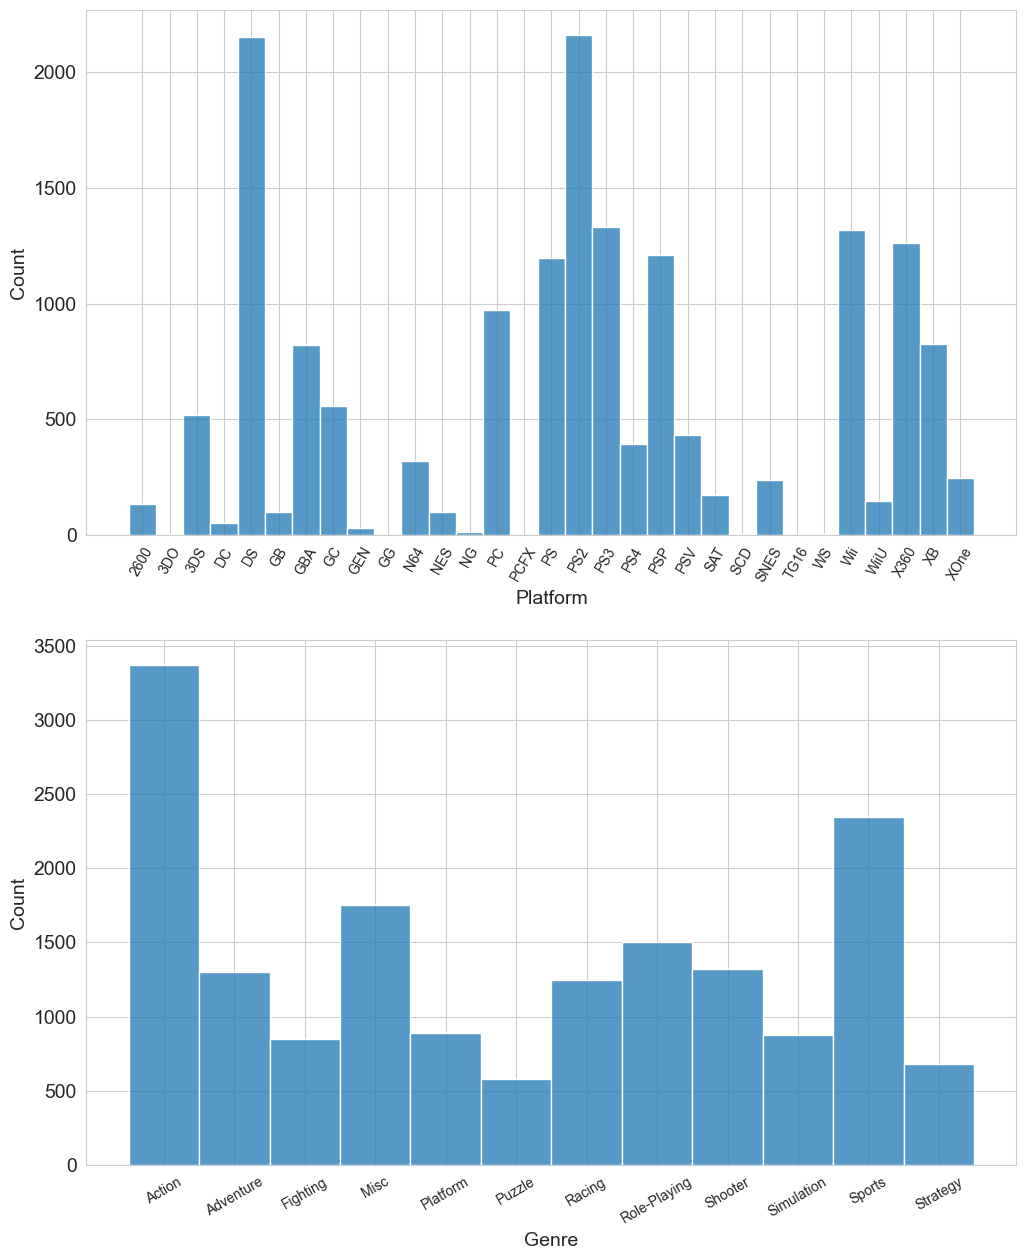

In [88]:
# Let's start exploring how many different platforms and genres the dataset contains and how many games were published for each platform and genre.

fig, axes = plt.subplots(2,1, figsize=(12,15))

platforms = sns.histplot(ax=axes[0], data=game_df['Platform'].sort_values())
platforms.set_xticklabels(platforms.get_xticklabels(), rotation=60, fontsize=10)

genre = sns.histplot(ax=axes[1], data=game_df['Genre'].sort_values())
genre.set_xticklabels(genre.get_xticklabels(), rotation=30, fontsize=10)


plt.show()


Text(0.5, 1.0, 'Top 15 Platforms with Greatest Game Sales')

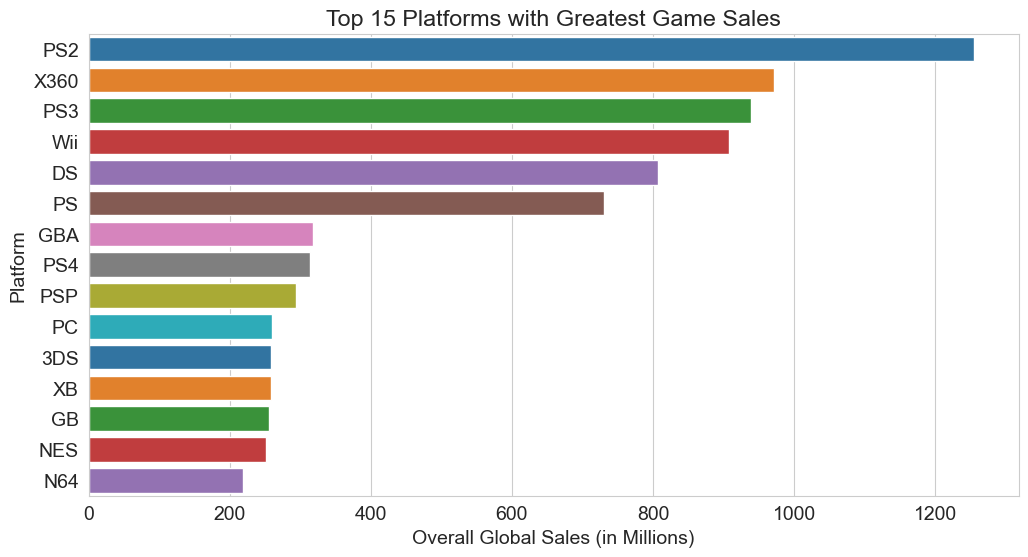

In [91]:
# Platforms with more sold games
fig = plt.subplots(figsize=(12,6))

df = game_df.groupby('Platform').sum()[['NA_Sales', 'Global_Sales']]
df['Global_Sales'] /= 1000000

sns.barplot(data=df, 
            x='Global_Sales', 
            y=df.index, 
            order=df.sort_values('Global_Sales', ascending=False).head(15).index,
            palette='tab10')

plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Overall Global Sales (in Millions)')
plt.title('Top 15 Platforms with Greatest Game Sales')

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

Text(0.5, 0, 'Sales (in Million Units)')

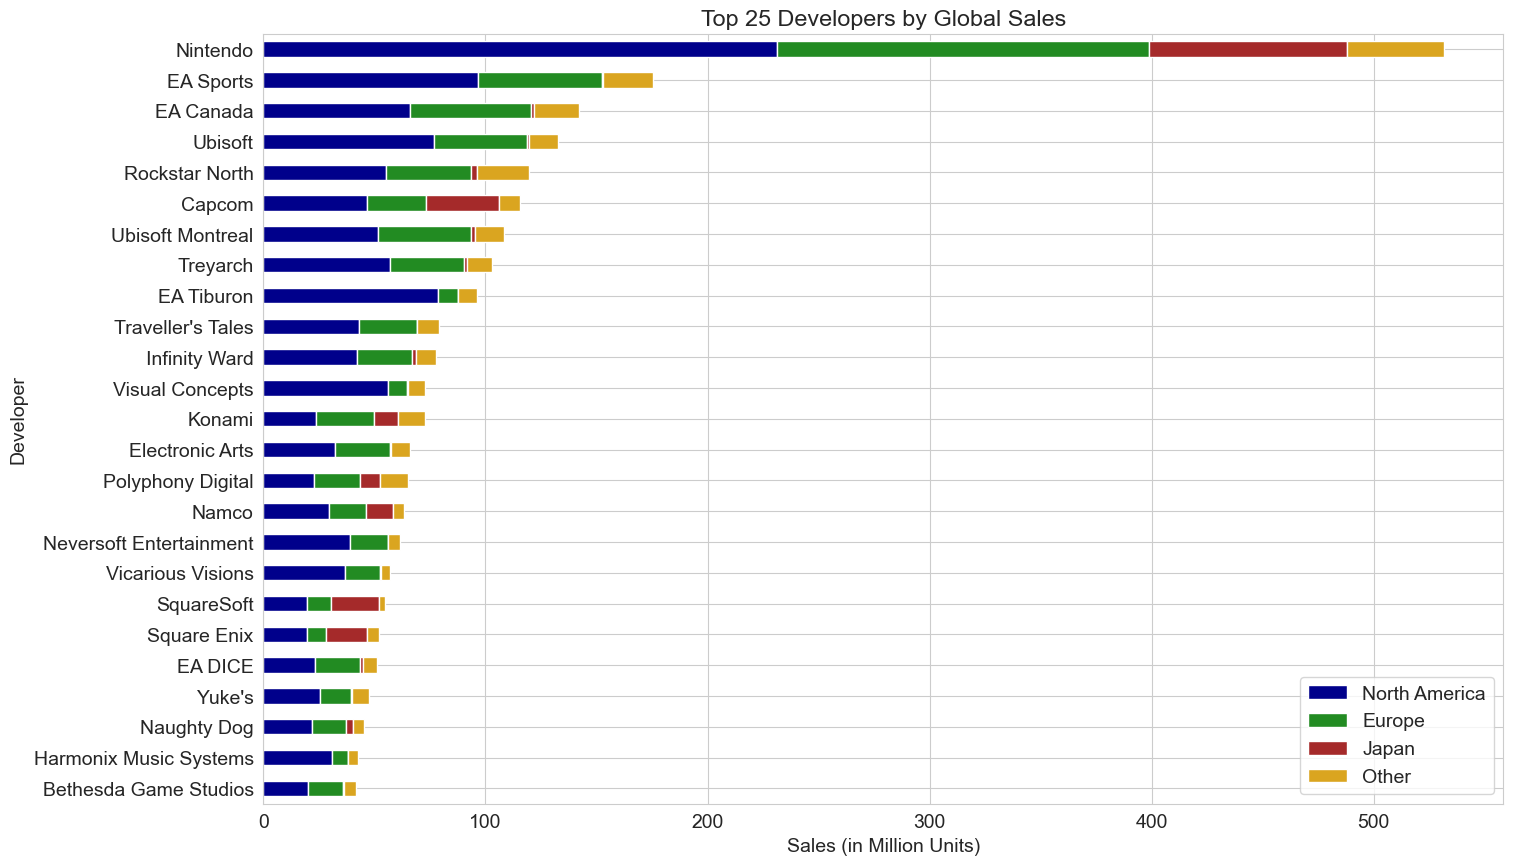

In [96]:
# Top developers by sales
df = game_df.groupby('Developer').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sort_values('Global_Sales',ascending=False).drop('Global_Sales', axis=1).head(25)
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] /= 1000000

df.plot(kind='barh', stacked=True, color=['darkblue', 'forestgreen', 'brown', 'goldenrod'], figsize=(16,10))
plt.gca().invert_yaxis()
plt.legend(['North America', 'Europe', 'Japan', 'Other'])
plt.title('Top 25 Developers by Global Sales')
plt.xlabel('Sales (in Million Units)')

<AxesSubplot: xlabel='Year_of_Release', ylabel='Count'>

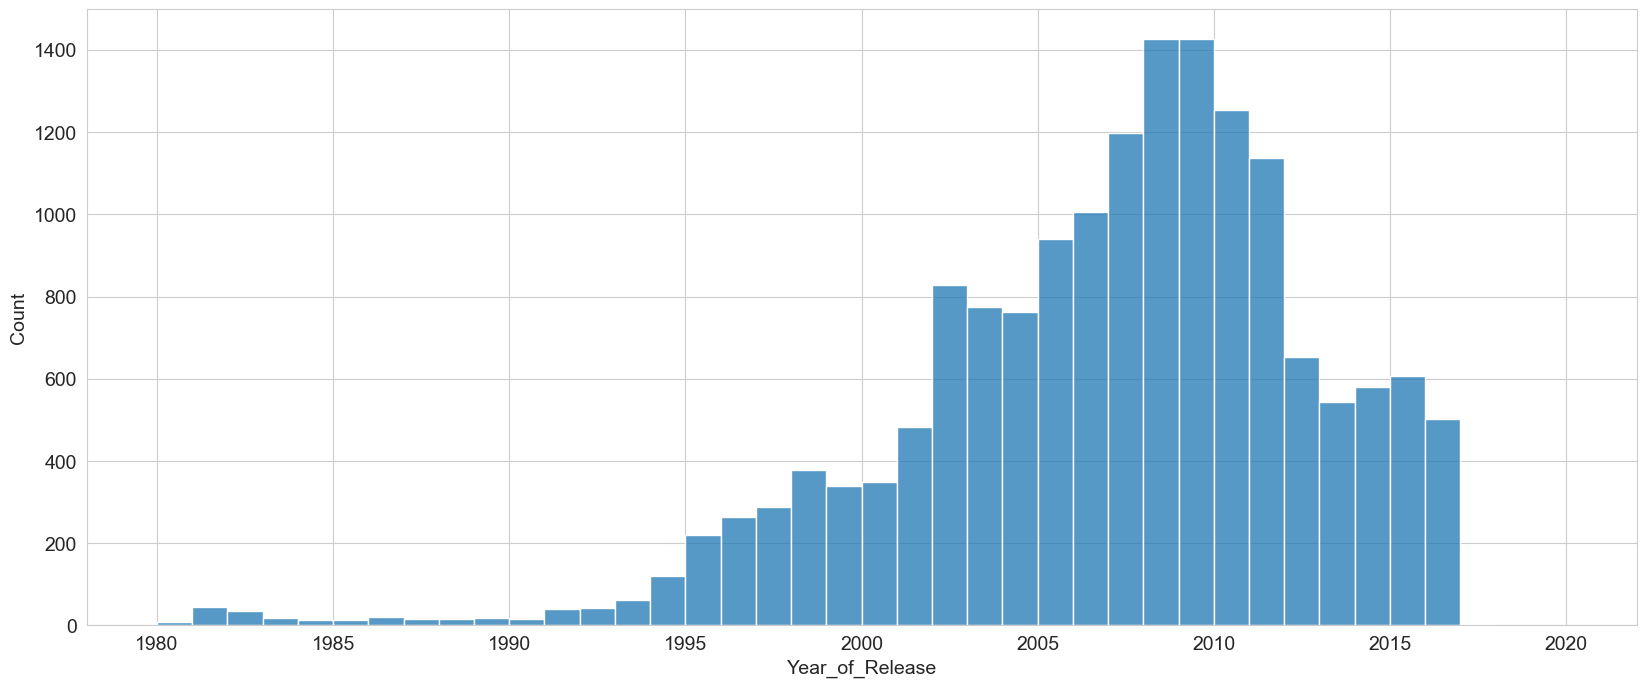

In [134]:
# Games released each year
fig = plt.subplots(figsize=(20,8))
sns.histplot(data=game_df, x='Year_of_Release', bins=2020-1980)

Let us save and upload our work to Jovian before continuing

In [135]:
jovian.commit(project=project_name, filename='video-game-sales-exploratory-analysis.ipynb')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "matiascarbone/video-game-sales-exploratory-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/matiascarbone/video-game-sales-exploratory-analysis


'https://jovian.ai/matiascarbone/video-game-sales-exploratory-analysis'

## Asking and Answering Questions

TODO - write some explanation here.



> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1: TODO - ask a question here and answer it below

#### Q2: TODO - ask a question here and answer it below

#### Q3: TODO - ask a question here and answer it below

#### Q4: TODO - ask a question here and answer it below

#### Q5: TODO - ask a question here and answer it below

Let us save and upload our work to Jovian before continuing.

In [ ]:
jovian.commit(project=project_name, filename='video-game-sales-exploratory-analysis.ipynb')

## Inferences and Conclusion

**TODO** - Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

In [31]:
jovian.commit(project=project_name, filename='video-game-sales-exploratory-analysis.ipynb')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..

[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/

[jovian] Uploading notebook..

[jovian] Capturing environment..

[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [35]:
jovian.commit(project=project_name, filename='video-game-sales-exploratory-analysis.ipynb')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..

[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/

[jovian] Uploading notebook..

[jovian] Capturing environment..

[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'